In [2]:
# Imports iniciales de librerías a utilizar

In [11]:
import pandas as pd
import numpy as np
from math import dist
from cmath import polar
from matplotlib import pyplot as mpl

In [4]:
# Creación de centros de coordenadas para cada ejercicio, y generador de datos

In [12]:
def centros_eja(d):
    c_1 = []
    c_2 = []

    for i in range(d):
        c_1.append(1)
        c_2.append(-1)

    return (c_1, c_2)


def centros_ejb(d):
    c_1 = []
    c_2 = []

    for i in range(d):
        if not (i):
            c_1.append(1)
            c_2.append(-1)
        else:
            c_1.append(0)
            c_2.append(0)

    return (c_1, c_2)


def generar_valores(centros, c, d, n):
    (c_1, c_2) = centros
    std_dev = c**2
    dev_mat = np.diag([std_dev] * d)
    values_centro_1 = (
        np.random.default_rng()
        .multivariate_normal(mean=c_1, cov=dev_mat, size=n // 2)
        .tolist()
    )
    values_centro_2 = (
        np.random.default_rng()
        .multivariate_normal(mean=c_2, cov=dev_mat, size=n // 2)
        .tolist()
    )

    values_centro_1 = [v + [0] for v in values_centro_1]
    values_centro_2 = [v + [1] for v in values_centro_2]

    dataframe = pd.DataFrame(
        values_centro_1 + values_centro_2, columns=list(range(d)) + ["Class"]
    )

    return dataframe

In [6]:
# Funcion de plot para todos los ejercicios, asume una clasificacion

In [13]:
def plot(df):
    color_decide = np.where(df["Class"] == 1, "DarkBlue", "DarkGreen")

    axis = df.plot.scatter(
        0,
        1,
        c=color_decide,
    )

    axis.set_xlabel("x")
    axis.set_ylabel("y")

    axis.grid(which="both", color="grey", linewidth=1, linestyle="-")
    mpl.show()

In [8]:
# Test ejercicio 1A

In [17]:
def test_ej_1a():
    d = 2
    n = 200
    c = 0.75
    centros = centros_eja(d)
    dataframe = generar_valores(centros, c, d, n)
    plot(dataframe)

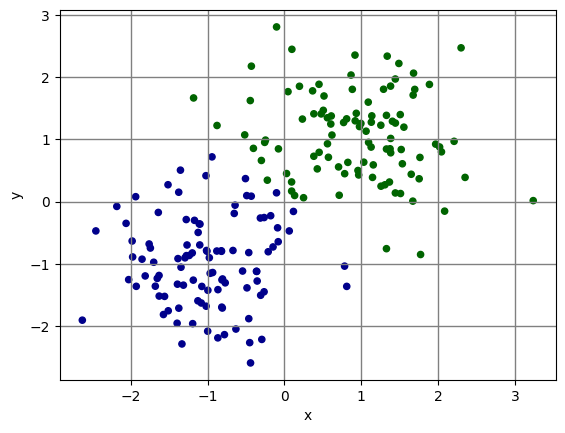

In [18]:
test_ej_1a()

In [19]:
# Test ejercicio 1B

In [20]:
def test_ej_1b():
    d = 2
    n = 200
    c = 0.75
    centros = centros_ejb(d)
    dataframe = generar_valores(centros, c, d, n)
    plot(dataframe)

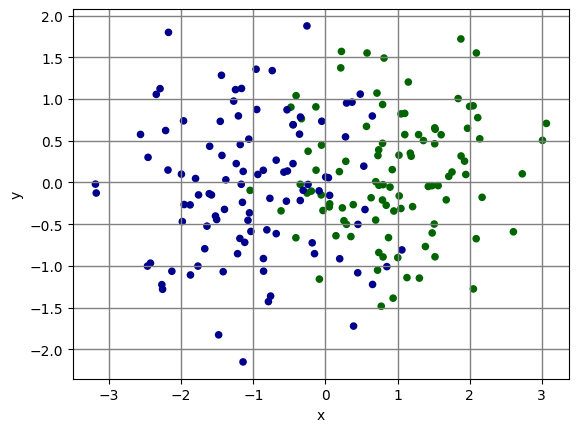

In [21]:
test_ej_1b()

In [22]:
# Tests de ejercicio 2 sobre media y desviación estandar

In [23]:
def test_ej_2a():
    d = 4
    n = 5000
    c = 2
    centros = centros_eja(d)
    dataframe = generar_valores(centros, c, d, n)
    print(dataframe.groupby(["Class"]).mean())
    print(dataframe.groupby(["Class"]).std())


def test_ej_2b():
    d = 4
    n = 5000
    c = 2
    centros = centros_ejb(d)
    dataframe = generar_valores(centros, c, d, n)
    print(dataframe.groupby(["Class"]).mean())
    print(dataframe.groupby(["Class"]).std())

In [24]:
test_ej_2a()

              0         1         2         3
Class                                        
0      1.053627  0.996693  0.969271  1.085100
1     -0.973261 -1.010954 -1.041130 -1.096371
              0         1         2         3
Class                                        
0      1.972858  2.010524  1.989763  1.981635
1      2.047646  2.011454  2.013293  2.011329


In [25]:
test_ej_2b()

              0         1         2         3
Class                                        
0      1.037373  0.052802 -0.047653  0.041965
1     -0.959806  0.134241 -0.020346 -0.025198
              0         1         2         3
Class                                        
0      1.950976  1.972153  1.982265  1.989614
1      1.962228  2.017697  2.054383  1.948237


In [26]:
# Podemos ver que las medias tienden a los centros, y las desviaciones estandar tienden a 2 (el valor de C)

In [27]:
# Generación de valores para el ejercicio 3, con valores polares para la generación de clases

In [28]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)


def fst_function(theta):
  return theta/(4*np.pi)


def snd_function(theta):
  return (theta + np.pi)/(4*np.pi)


def random_points(n):
    points = []
    for i in range(n):
        [x,y] = (np.random.uniform(-1,1),np.random.uniform(-1,1))
        while dist([0,0],[x,y]) > 1:
            (x,y) = (np.random.uniform(-1,1),np.random.uniform(-1,1))
        points.append([x,y])
    return points


def change_to_polars(distribution):
    polar_distribution = []
    for p in distribution:
        (r,theta) = polar(complex(p[0],p[1]))
        polar_distribution.append([r,theta])
    return polar_distribution


def espiral_dataframe_with_class(points):
    polar_points = change_to_polars(points)
    i = 0

    for [rho,theta] in polar_points:
        class_0 = fst_function(theta) < rho < snd_function(theta) or fst_function(theta) + 0.5 < rho < snd_function(theta) + 0.5 or fst_function(theta) + 1 < rho < snd_function(theta) + 1
    
        if class_0: 
            points[i].append(0) 
        else: 
            points[i].append(1)
        i += 1

    return pd.DataFrame(points, columns=[0,1,"Class"])

In [29]:
# Definimos el test para el caso de los espirales (se veía mejor con más datos, como 10000 en adelante)

In [30]:
def test_espirales():
    n = 2000
    points = random_points(n)
    dataframe = espiral_dataframe_with_class(points)
    plot(dataframe)

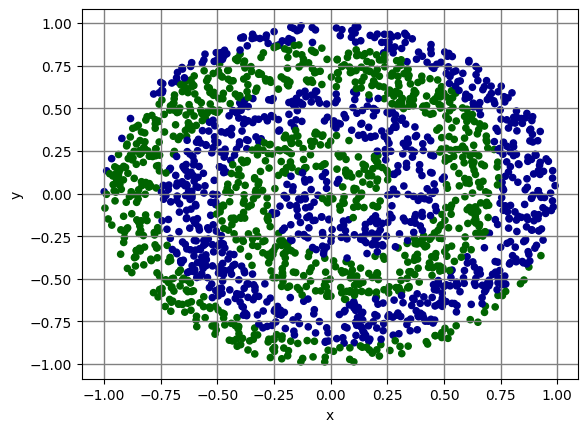

In [31]:
test_espirales()